In [23]:
import os

from time import sleep

from core.manager import Manager
from core.managers.cromwell_manager import CromwellManager
from core.workflow_validator import validate_wdl
from utils import make_absolute_path

#### Prepare files

In [24]:
wdl_file = "wdls/covid_analysis.wdl"
output_directory = make_absolute_path("outputs")

#### Input options

In [17]:
input_options = {
    "CoronavirusAnalysis.fasta_file": "data/coronavirus.fasta",
    "CoronavirusAnalysis.gc_content_script": "logics/gc_content.py",
    "CoronavirusAnalysis.sequence_length_script": "logics/sequence_length.py",
    "CoronavirusAnalysis.transcription_script": "logics/transcription.py",
    "CoronavirusAnalysis.pipfile": "logics/Pipfile",
    "CoronavirusAnalysis.pipfile_lock": "logics/Pipfile.lock",
}
options = {
    "final_workflow_outputs_dir": output_directory,
    "use_relative_output_paths": True,
}

#### validate wdl

In [18]:
validate_wdl(wdl_file)
if not validate_wdl(wdl_file):
    print("WDL is not valid")
    exit(1)

#### initiate manager

In [19]:
manager = Manager(CromwellManager())
manager.authenticate()

You are not using any authentication with Cromwell. For security purposes, please consider adding authentication in front of your Cromwell instance!


#### submit workflow

In [20]:
submit_result = manager.submit_workflow(wdl_file, input_options, options)
print(submit_result)

{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'status': 'Submitted'}


In [21]:
# wait for workflow to finish
result = manager.get_workflow_status(submit_result["id"])
while not result or result[0]["status"] not in ["Succeeded", "Failed"]:
    result = manager.get_workflow_status(submit_result["id"])
    print(result)
    sleep(5)

[]
[{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'metadataArchiveStatus': 'Unarchived', 'name': 'CoronavirusAnalysis', 'start': '2024-08-28T12:06:10.609Z', 'status': 'Running', 'submission': '2024-08-28T12:06:07.277Z'}]
[{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'metadataArchiveStatus': 'Unarchived', 'name': 'CoronavirusAnalysis', 'start': '2024-08-28T12:06:10.609Z', 'status': 'Running', 'submission': '2024-08-28T12:06:07.277Z'}]
[{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'metadataArchiveStatus': 'Unarchived', 'name': 'CoronavirusAnalysis', 'start': '2024-08-28T12:06:10.609Z', 'status': 'Running', 'submission': '2024-08-28T12:06:07.277Z'}]
[{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'metadataArchiveStatus': 'Unarchived', 'name': 'CoronavirusAnalysis', 'start': '2024-08-28T12:06:10.609Z', 'status': 'Running', 'submission': '2024-08-28T12:06:07.277Z'}]
[{'id': 'ee89475c-eb2b-46a6-a60e-8ae4d38f43a0', 'metadataArchiveStatus': 'Unarchived', 'name': 'CoronavirusAnalysis', 'st

In [26]:
files = [f for f in os.listdir(output_directory) if os.path.isfile(os.path.join(output_directory, f))]

# Iterate over each file and print its content
for file_name in files:
    file_path = os.path.join(output_directory, file_name)
    print(f"Contents of {file_name}:\n")
    
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
        print("\n" + "="*40 + "\n")  # Separator between file contents

Contents of sequence_length.txt:

29903


Contents of transcribed_sequences.txt:

>NC_045512.2
AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCA

#### Read the output files

In [30]:
from Bio import SeqIO

# 파일 경로
file_path = "outputs/transcribed_sequences.txt"

# 파일 불러오기
with open(file_path, "r") as file:
    sequences = list(SeqIO.parse(file, "fasta"))

# 각 시퀀스 출력
for seq_record in sequences:
    print(f"ID: {seq_record.id}")
    print(f"Sequence: {seq_record.seq}\n")


ID: NC_045512.2
Sequence: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUG

/Users/taelim.hwang/.local/share/virtualenvs/oss-2024-bios-gsV86mpV/lib/python3.11/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


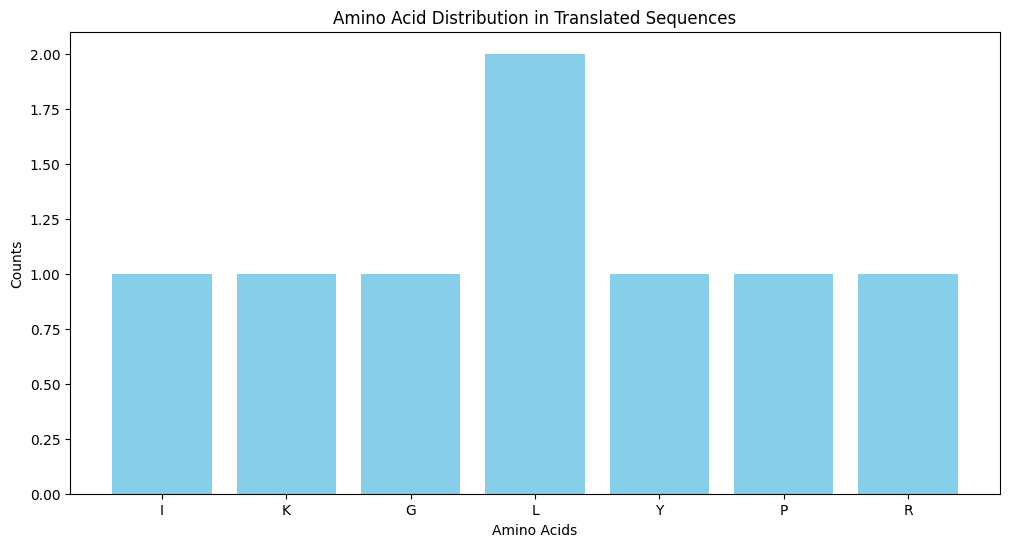

In [41]:
import matplotlib.pyplot as plt
from collections import Counter

# 전사 및 번역 과정
translated_sequences = []
for seq_record in sequences: # RNA 서열로 전사
    translated_seq = seq_record.translate(to_stop=True)  # 번역, stop codon에서 중지
    translated_sequences.append(translated_seq)

# 시각화할 데이터를 계산
amino_acid_counts = Counter()
for translated_seq in translated_sequences:
    amino_acid_counts.update(translated_seq)

# 시각화
amino_acids = list(amino_acid_counts.keys())
counts = list(amino_acid_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(amino_acids, counts, color='skyblue')
plt.xlabel('Amino Acids')
plt.ylabel('Counts')
plt.title('Amino Acid Distribution in Translated Sequences')
plt.show()

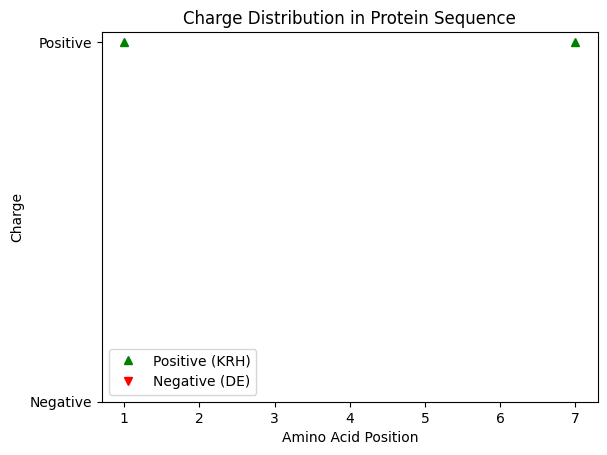

In [46]:
import matplotlib.pyplot as plt

# 번역된 단백질 서열 (예시 서열, 실제 서열로 대체)
protein_sequence = translated_sequences[0]

# 양전하와 음전하 아미노산의 위치
positive_positions = [i for i, aa in enumerate(protein_sequence) if aa in "KRH"]
negative_positions = [i for i, aa in enumerate(protein_sequence) if aa in "DE"]

# 시각화
plt.plot(positive_positions, [1]*len(positive_positions), 'g^', label="Positive (KRH)")
plt.plot(negative_positions, [-1]*len(negative_positions), 'rv', label="Negative (DE)")
plt.yticks([-1, 1], ["Negative", "Positive"])
plt.title("Charge Distribution in Protein Sequence")
plt.xlabel("Amino Acid Position")
plt.ylabel("Charge")
plt.legend()
plt.show()
